# 010.Simple Linear Regression

## Univariate Linear Regression (단변수 선형회귀)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
dia = datasets.load_diabetes()
dia # 파이썬의 딕셔너리 형태로 내장되어 있음 
# 키값이 데이터고 Value로 데이터 값들이 있음
# 키값이 target이라고 해서 해당되는 데이터에 대한 정답값이 있음 
# description이라고 설명이 쭉 있음
# feature name이라고 10가지 피처가 어떤 피처인지 구성되어 있음

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
print(dia.DESCR) # 데이터셋에 대한 설명을 알고 싶을 때 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
dia.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
dia.data.shape

(442, 10)

In [10]:
dia.target.shape

(442,)

In [12]:
df = pd.DataFrame(dia.data, columns = dia.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## univariate linear regression data 생성

In [16]:
# 시각화를 하기 위해서 10가지 피처 중에서 하나만 골라서 시각화를 할 것 
dia_X = df['bmi'].values
dia_X.shape # shape을 보면 벡터 형태로 이뤄져 있음 (442,)
# sckit learn의 입력 데이터는 Matrix 형태, 2차원 Array 형태로 만들어줘야됨
# reshape 해주기 

(442,)

In [18]:
dia_X = df['bmi'].values.reshape(-1,1) # -1로 설정해주면 자동으로 차원으로 맞춰놓음
dia_X.shape

(442, 1)

In [20]:
dia_X # 2차원 배열 형태로 입력 데이터가 reshape 되었음

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [23]:
dia_X_train = dia_X[:-20] # 앞에서부터 20개
dia_X_test = dia_X[-20:] # 뒤에서부터 20개
# train 데이터 422개, test 데이터 20개로 나뉘어짐.
dia_X_train.shape, dia_X_test.shape

((422, 1), (20, 1))

In [26]:
dia_y_train = dia.target[:-20]
dia_y_test = dia.target[-20:]
# 정답 레이블도 훈련데이터, 테스트 데이터 나눠줌.
dia_y_train.shape, dia_y_test.shape

((422,), (20,))

## sklearn model 이용

In [ ]:
# 스케일링이 이미 된 상태이고 데이터를 훈련,검증용으로 분할해줬기 때문에
# 이제 모델에 입력을 해서 모델 훈련만 시키면 된다.

In [27]:
regr = linear_model.LinearRegression() #인스턴스 생성

regr.fit(dia_X_train, dia_y_train) #X_train과 거기에 매칭되는 정답 데이터를 주고 모델 훈련시킴

LinearRegression()

In [28]:
# 이제 예측을 하는 단계
# 기울기하고 절편이 만들어져 있음
regr.coef_  # 기울기

array([938.23786125])

In [30]:
regr.intercept_ # 절편
# 1차 방정식이니깐 기울기하고 절편 두개를 구했으니 그림을 그릴 수 있음

152.91886182616113

In [31]:
y_pred = regr.predict(dia_X_test) # 테스트로 분할했던 20개 데이터를 여기에 입력 해줌 
y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [33]:
dia_y_test #우리가 알고 있는 정답 
# 위에 예측된 y_pred과 정답 dia_y_test이 얼마나 비슷한지 시각화하는 단

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

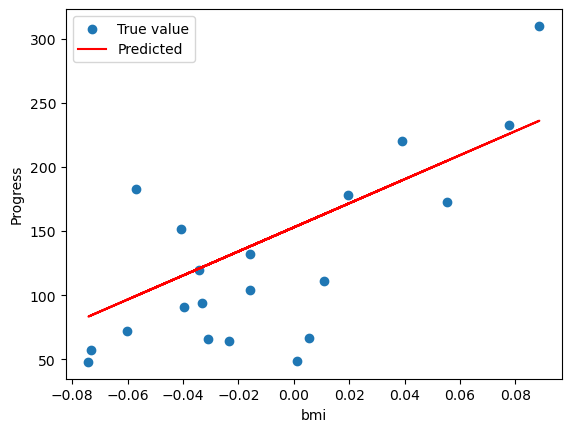

In [41]:
# 실제 데이터에 대한 산점도 시각
plt.scatter(dia_X_test, dia_y_test, label = "True value") #파란색 점은 실제 데이터
plt.plot(dia_X_test, y_pred, color = "r", label = "Predicted") # 빨간색이 모델이 예측한 회귀 라인
plt.xlabel('bmi')
plt.ylabel('Progress') #진행률
plt.legend()

## R2 계산

In [ ]:
# 회귀식의 정확도를 숫자로서 측정하는 것이 R2계수(=결정계수)
# 예측한 값이 실제 데이터와 얼마나 떨어져 있는지 R2로 계산해보기 
# R2가 1에 가까우면 아주 정확하게, 0에 가까우면 하나도 못 맞춘 경우 

In [42]:
# 실값, 예측값을 넣어줌
r2_score(dia_y_test, y_pred)
# 단변수 선형회귀 이니깐 정확하지 않음
# 10개의 피처가 있으나깐 그걸 다 고려한다면 더 정확해짐 

0.47257544798227147

In [45]:
mean_squared_error(dia_y_test, y_pred)

2548.07239872597

## Multivariate Linear Regression (다변수 선형회귀)

bmi, bp 두가지 변수를 이용한 Linear Regression

단변수 선형회귀를 썼을 때 보다 더 정확해지는지 보자!!

In [46]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [54]:
#dia_X = df[['bmi','bp']].values 두 개 이상의 피처를 추출하고 싶으면 [] 대괄호 두 번 쓰기
# 두 개 이상을 추출하면 두 개 자체가 Metrix 이니깐 reshape을 할 필요가 없음!
dia_X = df.values
dia_X.shape

(442, 10)

In [55]:
dia_X_train = dia_X[:-20] # 앞에서부터 20개
dia_X_test = dia_X[-20:] # 뒤에서부터 20개
# train 데이터 422개, test 데이터 20개로 나뉘어짐.
dia_X_train.shape, dia_X_test.shape

((422, 10), (20, 10))

In [56]:
dia_y_train = dia.target[:-20]
dia_y_test = dia.target[-20:]
# 정답 레이블도 훈련데이터, 테스트 데이터 나눠줌.
dia_y_train.shape, dia_y_test.shape

((422,), (20,))

In [57]:
regr = linear_model.LinearRegression() #인스턴스 생성

regr.fit(dia_X_train, dia_y_train)

LinearRegression()

In [58]:
y_pred = regr.predict(dia_X_test) # 테스트로 분할했던 20개 데이터를 여기에 입력 해줌 
y_pred

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

In [60]:
r2_score(dia_y_test, y_pred) # 예측한 값이 더 안 좋아짐 # 0.
# 하나 더 해서 특별히 좋아진게 없다 --> 10개의 피처를 다 써보자.
# BMI,bp 두 개를 사용한 경우 : 0.4653
# 10개를 다 썼을 경우 : 0.5850

0.585085427447195